In [1]:
import torch
import torch.nn as nn

/home/smrserraoseabr/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

### 1-variable input and output

In [2]:
class Mymodel(nn.Module): 
    def __init__(self, a, b):
        super().__init__()
        self.a = nn.Parameter(torch.tensor(a))
        self.b = nn.Parameter(torch.tensor(b))
        
    def forward(self, x):
        return self.a*x + self.b

# Instantiate the model
mymodel = Mymodel(a = 2., b = 1.)

# Create input and enable gradient calculation
input_data = torch.tensor(4.)
input_data.requires_grad = True
#input_data = torch.tensor([4.,5.], requires_grad = True)

# Call the forward model
output_data = mymodel(input_data)
print('output =', output_data, '\n')

# Calculate the gradients
mymodel.zero_grad() # Clear any existing gradients
output_data.backward()
print('Gradients:')
print('d(output)/d(a) =',mymodel.a.grad)
print('d(output)/d(b) =',mymodel.b.grad)
print('d(output)/d(input) =',input_data.grad)    

# obj = a*x + b
# d(obj)/d(a) = x
# d(obj)/d(b) = 1.
# d(obj)/d(x) = a

output = tensor(9., grad_fn=<AddBackward0>) 

Gradients:
d(output)/d(a) = tensor(4.)
d(output)/d(b) = tensor(1.)
d(output)/d(input) = tensor(2.)


###  n-variable input and 1-variable output

In [3]:
import torch
import torch.nn as nn

class Mymodel(nn.Module): 
    def __init__(self, a, b):
        super().__init__()
        self.a = nn.Parameter(torch.tensor(a))
        self.b = nn.Parameter(torch.tensor(b))
        
    def forward(self, x):
        return torch.sum(self.a*x) + self.b

# Instantiate the model
mymodel = Mymodel(a = [2.,3.], b = 1.)

# Create input and enable gradient calculation
input_data = torch.tensor([4.,5.])
input_data.requires_grad = True
#input_data = torch.tensor([4.,5.], requires_grad = True)

# Call the forward model
output_data = mymodel(input_data)
print('output =', output_data, '\n')

# Calculate the gradients
mymodel.zero_grad() # Clear any existing gradients
output_data.backward()
print('Gradients:')
print('d(output)/d(a) =',mymodel.a.grad)
print('d(output)/d(b) =',mymodel.b.grad)
print('d(output)/d(input) =',input_data.grad)  

# obj = a1*x1 + a2*x2 + b
# d(obj)/d(a1) = x1, d(obj)/d(a2) = x2 
# d(obj)/d(b) = 1.
# d(obj)/d(x1) = a1, d(obj)/d(x2) = a2 

output = tensor(24., grad_fn=<AddBackward0>) 

Gradients:
d(output)/d(a) = tensor([4., 5.])
d(output)/d(b) = tensor(1.)
d(output)/d(input) = tensor([2., 3.])


###  n-variable input and n-variable output

In [4]:
class Mymodel(nn.Module): 
    def __init__(self, a, b):
        super().__init__()
        self.a = nn.Parameter(torch.tensor(a))
        self.b = nn.Parameter(torch.tensor(b))
        
    def forward(self, x):
        return self.a*x + self.b


# Instantiate the model
mymodel = Mymodel(a = [2.,3.], b = 1.)

# Create input and enable gradient calculation
input_data = torch.tensor([4.,5.])
input_data.requires_grad = True
#input_data = torch.tensor([4.,5.], requires_grad = True)

# Call the forward model
output_data = mymodel(input_data)
print('output =', output_data, '\n')

# Choose output -> e.g. torch.tensor([1,0]) or torch.tensor([0,1]); torch.tensor([1,1]) returns sum of grads
output_choose = torch.zeros_like(output_data)
output_choose[0] = 1 
#output_choose[1] = 1
print('output to calculate grad:', output_choose, '\n')

# Calculate the gradients
mymodel.zero_grad() # Clear any existing gradients
output_data.backward(output_choose) 
print('Gradients:')
print('d(output)/d(a) =',mymodel.a.grad)
print('d(output)/d(b) =',mymodel.b.grad)
print('d(output)/d(input) =',input_data.grad)   

# obj1 = a1*x1 + b
# obj2 = a2*x2 + b
# d(obj1)/d(a1) = x1, # d(obj1)/d(a2) = 0 
# d(obj2)/d(a1) = 0,  # d(obj2)/d(a2) = x2 
# d(obj1)/d(b) = 1.
# d(obj2)/d(b) = 1.
# d(obj1)/d(x1) = a1, # d(obj1)/d(x2) = 0 
# d(obj2)/d(x1) = 0,  # d(obj2)/d(x2) = a2 


output = tensor([ 9., 16.], grad_fn=<AddBackward0>) 

output to calculate grad: tensor([1., 0.]) 

Gradients:
d(output)/d(a) = tensor([4., 0.])
d(output)/d(b) = tensor(1.)
d(output)/d(input) = tensor([2., 0.])


### Using torch.autograd.grad

The difference is that autograd.grad() is returning the gradients to you.
While .backward() is populating the .grad field on the different leaf Tensors that were used to compute y.

In [5]:
class Mymodel(nn.Module): 
    def __init__(self, a, b):
        super().__init__()
        self.a = nn.Parameter(torch.tensor(a))
        self.b = nn.Parameter(torch.tensor(b))
        
    def forward(self, x):
        return self.a*x + self.b


# Instantiate the model
mymodel = Mymodel(a = [2.,3.], b = 1.)

# Create input and enable gradient calculation
input_data = torch.tensor([4.,5.])
input_data.requires_grad = True
#input_data = torch.tensor([4.,5.], requires_grad = True)

# Call the forward model
output_data = mymodel(input_data)
print('output =', output_data, '\n')

# Choose output -> e.g. torch.tensor([1,0]) or torch.tensor([0,1]); torch.tensor([1,1]) returns sum of grads
output_choose = torch.zeros_like(output_data)
output_choose[0] = 1
output_choose[1] = 0
print('output to calculate grad:', output_choose, '\n')

# Calculate the gradients
grad = torch.autograd.grad(output_data, input_data, output_choose)
print('Gradients:')
print('d(output)/d(input) =',grad)   
print('d(output)/d(input) =',input_data.grad) # torch.autograd.grad return the gradient do not save it

# obj1 = a1*x1 + b
# obj2 = a2*x2 + b
# d(obj1)/d(x1) = a1, # d(obj1)/d(x2) = 0 
# d(obj2)/d(x1) = 0,  # d(obj2)/d(x2) = a2 

output = tensor([ 9., 16.], grad_fn=<AddBackward0>) 

output to calculate grad: tensor([1., 0.]) 

Gradients:
d(output)/d(input) = (tensor([2., 0.]),)
d(output)/d(input) = None


In [12]:
import torch
from scipy.optimize import minimize

# Função objetivo
def f(x):
    x = torch.tensor(x, requires_grad=True)
    y = x ** -5
    y.backward()
    return y.item()

# Função gradiente
def f_prime(x):
    x = torch.tensor(x, requires_grad=True)
    y = x **-5
    y.backward()
    return x.grad.item()

# Valor inicial de x
x0 = [2.0]

# Chame a função minimize do Scipy
res = minimize(f, x0, jac=f_prime, method='BFGS')

# Imprime o resultado da otimização
print("O valor otimizado de x é: ", res.x)


O valor otimizado de x é:  [9.11318414]


Otimização sem gradientes:
Número de iterações:  18
Valor mínimo alcançado:  1.8518632544681295e-11

Otimização com gradientes:
Número de iterações:  17
Valor mínimo alcançado:  1.4954277099747404e-15


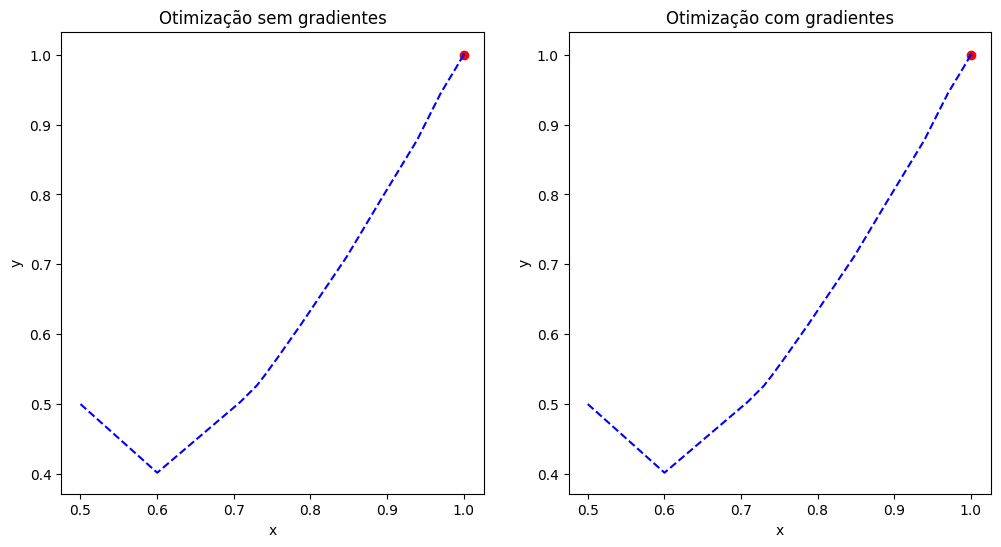

In [13]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import torch

# Definindo a função de Rosenbrock
def rosenbrock(x):
    return (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

# Definindo a função que calcula os gradientes da função de Rosenbrock
def rosenbrock_grad(x):
    x = torch.tensor(x, dtype=torch.float64, requires_grad=True)
    y = (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2
    y.backward()
    return x.grad.numpy()

# Função callback para armazenar o caminho
def callback(x, path):
    path.append(np.copy(x))

# Inicializando x
x0 = np.array([0.5, 0.5])

# Listas para armazenar os caminhos
path_no_grad = [np.copy(x0)]
path_with_grad = [np.copy(x0)]

# Minimizando a função de Rosenbrock sem gradientes
res_no_grad = minimize(rosenbrock, x0, method='BFGS', callback=lambda x: callback(x, path_no_grad))
print("Otimização sem gradientes:")
print("Número de iterações: ", res_no_grad.nit)
print("Valor mínimo alcançado: ", res_no_grad.fun)

# Minimizando a função de Rosenbrock com gradientes
res_with_grad = minimize(rosenbrock, x0, method='BFGS', jac=rosenbrock_grad, callback=lambda x: callback(x, path_with_grad))
print("\nOtimização com gradientes:")
print("Número de iterações: ", res_with_grad.nit)
print("Valor mínimo alcançado: ", res_with_grad.fun)

# Converter os caminhos para np.array
path_no_grad = np.array(path_no_grad)
path_with_grad = np.array(path_with_grad)

# Plotando os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Otimização sem gradientes")
plt.plot([1], [1], 'ro')  # Posição do mínimo real
plt.plot(path_no_grad[:, 0], path_no_grad[:, 1], 'b--')  # Caminho da otimização
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.title("Otimização com gradientes")
plt.plot([1], [1], 'ro')  # Posição do mínimo real
plt.plot(path_with_grad[:, 0], path_with_grad[:, 1], 'b--')  # Caminho da otimização
plt.xlabel('x')
plt.ylabel('y')

plt.show()
